In [ ]:
# ! pip install numpy
! pip install matplotlib
! pip install scipy

import numpy as np 
import matplotlib.pyplot as plt
import scipy.constants as const
import scipy.special

# 4 CDMA

## Exercise 14: CDMA
A Codemultiplex system is used for data transmission. The transmit impulse has the following shape

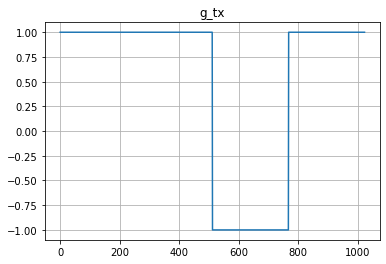

In [72]:
T = 256
g_tx = np.zeros(4*T)

g_tx[0:T] = 1
g_tx[T:2*T] = 1
g_tx[2*T:3*T] = -1
g_tx[3*T:4*T] = 1 

plt.plot(g_tx)
plt.title("g_tx")
plt.grid(True)


### a) Sketch the causal impulse response of the respective matched filter $g_{RX}(t)$ at the receiver side.

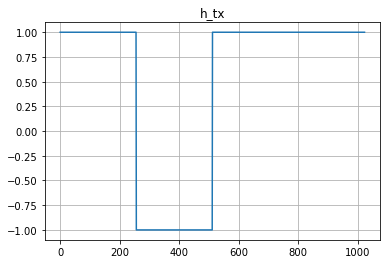

In [73]:
h_tx = np.flip(g_tx)

plt.plot(h_tx)
plt.title("h_tx")
plt.grid(True)

### b) Determine and sketch the overall impulse response $g_{RX}(t) \ast g_{TX}(t)$.

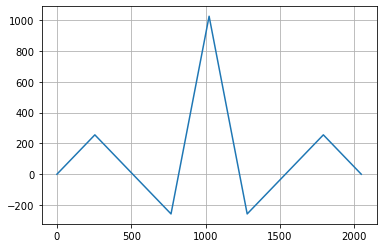

In [74]:
total_impulse = np.convolve(h_tx, g_tx)

plt.plot(total_impulse)
plt.grid(True)

### c) By which factor is the S/N-ratio (after the receive filter and ideal sampling) reduced, if a rectangular shaped impulse response of the duration $T$ and height 1 replaces the matched filter?

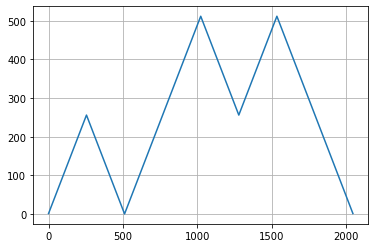

In [75]:
g_rx = np.ones(4*T)

total_impulse_rect = np.convolve(h_tx, g_rx)

plt.plot(total_impulse_rect)
plt.grid(True)

In [76]:
max_impulse = max(total_impulse)
max_impulse_rect = max(total_impulse_rect)

ratio = max_impulse/max_impulse_rect
ratio_db = 20 * np.log10(ratio)

print("The maximum is reduced by factor: ", ratio)
print("Corresponding to dB: ", ratio_db)

The maximum is reduced by factor:  2.0
Corresponding to dB:  6.020599913279624


## Exercise 15: CDMA

Three data signals are transmitted simultaneously at a rate of $1/T$ using CDMA (non frequency-selective channel). The corresponding codes $p_1(t)$, $p_2(t)$ and $p_3(t)$ are plotted below. The modulation is BPSK.


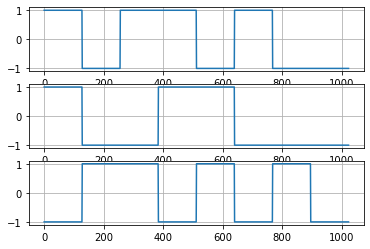

In [77]:
T = 1024

p1 = np.zeros(T)
p1[0:T//8] = 1
p1[T//8:2*T//8] = -1
p1[2*T//8:3*T//8] = 1
p1[3*T//8:4*T//8] = 1
p1[4*T//8:5*T//8] = -1
p1[5*T//8:6*T//8] = 1
p1[6*T//8:7*T//8] = -1
p1[7*T//8:8*T//8] = -1

p2 = np.zeros(T)
p2[0:T//8] = 1
p2[T//8:2*T//8] = -1
p2[2*T//8:3*T//8] = -1
p2[3*T//8:4*T//8] = 1
p2[4*T//8:5*T//8] = 1
p2[5*T//8:6*T//8] = -1
p2[6*T//8:7*T//8] = -1
p2[7*T//8:8*T//8] = -1

p3 = np.zeros(T)
p3[0:T//8] = -1
p3[T//8:2*T//8] = 1
p3[2*T//8:3*T//8] = 1
p3[3*T//8:4*T//8] = -1
p3[4*T//8:5*T//8] = 1
p3[5*T//8:6*T//8] = -1
p3[6*T//8:7*T//8] = 1
p3[7*T//8:8*T//8] = -1


fig, ax = plt.subplots(3,1)
ax[0].plot(p1)
ax[1].plot(p2)
ax[2].plot(p3)
ax[0].grid(True)
ax[1].grid(True)
ax[2].grid(True)

### a) Give an appropriate scheme of the receiver for the detection of signal 1.

Will be calculated on board

### b) Calculate the SIR (signal-to-interference-ratio) for the receiver designed in part a).

$$\int_0^T p_1(t)p_2(t)dt=T/8(+1+1-1+1-1-1+1+1)=T/4$$

In [78]:
SIR_12 = np.sum(p1*p2)/T

SIR_13 = np.sum(p1*p3)/T

print("Interference from user 2 to user 1: ", SIR_12)
print("Interference from user 3 to user 1: ", SIR_13)

Interference from user 2 to user 1:  0.25
Interference from user 3 to user 1:  -0.5


In [79]:
SIR_total = 1**2/(SIR_12**2 + SIR_13**2)

print("Signal to noise ratio: ", SIR_total)

Signal to noise ratio:  3.2


## Exercise 16: CDMA


The figure below shows a synchronous CDMA system. Two transmitters simultaneously transmit a single symbol $d_1 \in \{-1,\;  1\}$ and $d_2 \in \{-1,\;  1\}$, respectively, to a base station. At the transmitter the symbols are multiplied with the code sequences $c_1(k)$ and $c_2(k)$ with spreading factor $K=8$. In order to reconstruct the transmitted symbols at the receiver, the received signal is multiplied with the corresponding code sequence and subsequently summed up over $K$ chips. The  code sequence of the first transmitter is
$$c_1(k)= \left\{ \begin{array}{lll} \{ +1,\; -1,\; +1,\; - 1,\; +1,\; +1,\; -1,\; +1,\;\} & { for } & k=0,\cdots,7 \\  0 & { for } & k < 0, k > 7 \end{array} \right. .$$

### a) Given the sequences $c_A(k)$, $c_B(k)$ and $c_C(k)$ (shown below), choose an appropriate code sequence for user 2, so that an interference free transmission for both signals $x_1$ and $x_2$ can be guaranteed.
$$c_A(k)  = \{-1,\;  +1,\; +1,\; -1,\; -1,\; -1,\; +1,\; -1,\;\}; k=0,\cdots,7$$
$$c_B(k) =  \{ +1,\; +1,\; -1,\;   +1,\; -1,\; +1,\; -1,\; +1,\;\};  k=0,\cdots,7 $$
$$c_C(k) =  \{ +1,\; -1,\; -1,\; - 1,\; +1,\; -1,\; -1,\; +1,\;\}; k=0,\cdots,7$$


For all three sequences $c_A(k)=c_B(k)=c_C(k)=0$ holds for $k < 0, k > 7$.

In [80]:
c1 = np.array([1,-1,1,-1,1,1,-1,1])

ca = np.array([-1,1,1,-1,-1,-1,1,-1])
cb = np.array([1,1,-1,1,-1,1,-1,1])
cc = np.array([1,-1,-1,-1,1,-1,-1,1])

interference_a = np.sum(c1*ca)
interference_b = np.sum(c1*cb)
interference_c = np.sum(c1*cc)

print("Interfernce from user a to user 1: ", interference_a)
print("Interfernce from user b to user 1: ", interference_b)
print("Interfernce from user c to user 1: ", interference_c)

interference = np.array([interference_a, interference_b, interference_c])

best = min(abs(interference))
print("Best sequence: ", np.where(interference == best))


Interfernce from user a to user 1:  -4
Interfernce from user b to user 1:  0
Interfernce from user c to user 1:  4
Best sequence:  (array([1]),)


### b) For the given spreading factor, what is the maximum number of users which can communicate simultaneously with the base station without mutual interference.

In [81]:
number_of_user = len(c1)

print("max Number of users: ", number_of_user)

max Number of users:  8


### c) Assume that signal of the second user is received with a delay of one chip, as shown in the Figure below, and that the second transmitter spreads the data using code sequence $c_A(k)$. Determine the $S/N_\text{MUI}$ ratio of the signal $x_1=x_\text{Signal}+n_\text{MUI}$ after despreading, where $S$ denotes the power of $x_\text{Signal}$ and $N_\text{MUI}$ denotes the multi user interference power of $n_\text{MUI}$ caused by transmitter 2.

In [82]:
interference_power = 0
K = len(c1)
for k in range(1, K):
    interference_power += c1[k]*ca[k-1]
    
interference_power = abs(interference_power)**2

signal_power = 0
for k in range(0,K):
    signal_power += c1[k]*c1[k]
    
signal_power = abs(signal_power)**2  
    

In [83]:
SNMU = signal_power/interference_power

SNMU_db = 10*np.log10(SNMU)

print("The interference power is: ", interference_power)
print("The signal power is: ", signal_power)
print("The S/N_MU ratio in dB is: ", SNMU_db)


The interference power is:  1
The signal power is:  64
The S/N_MU ratio in dB is:  18.06179973983887


## Exercise 17: CDMA

Two user codes of a CDMA system are illustrated below, where $T_c$ is the chip duration and $T$ the symbol duration.

In [84]:
user1 = np.array([1,1,-1,-1,-1,-1,1,1])
user2 = np.array([1,-1,1,-1,1,-1,1,-1])

### a) Show that the codes are orthogonal.

In [85]:
def check_orthogonality(sequence1, sequence2):
    check = np.sum(sequence1*sequence2)
    if check == 0:
        return True
    else:
        return False
    

In [86]:
orthogonal = check_orthogonality(user1, user2)
print("Codes orthognal: ", orthogonal)


Codes orthognal:  True


### b)  How many orthogonal codes of the same length exist? Give two examples.

You can change the test sequence here.

In [87]:
test_sequence = np.array([1,1,1,1,1,1,1,1])

orthogonal = check_orthogonality(user1, test_sequence)
print("Codes orthognal: ", orthogonal)


Codes orthognal:  True


### c) Both user signals are asynchronously transmitted over a non-frequency-selective channel. The signal of user 2 is delayed by one chip compared to the signal of user 1. 
Sketch the signal of user 2 in the interval $iT\leq t\leq (i+1)T$ for $d_2(i)=d_2(i-1)=1$ 

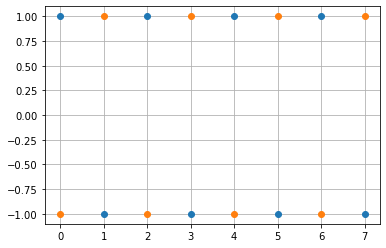

In [88]:
user2_shift_a = np.roll(user2, 1)
user2_shift_a[:1] *=1
plt.plot(user2, 'o')
plt.plot(user2_shift_a, 'o')
plt.grid(True)


and $d_2(i)=-d_2(i-1)=1$

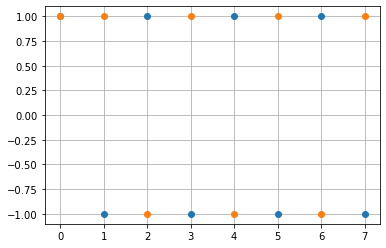

In [89]:
user2_shift_b = np.roll(user2, 1)
user2_shift_b[:1] *= -1
plt.plot(user2, 'o')
plt.plot(user2_shift_b, 'o')
plt.grid(True)


### d) Assuming $d_1(i)=1$, determine the correlator output signal of user 1 for both cases of part (c).

In [90]:
print(user1)

[ 1  1 -1 -1 -1 -1  1  1]


#### For $d_2(i-1) = 1$

$$ s_2 = [d_1(i) \cdot p_2(Nc); d_1(i) \cdot p_2(1:Nc-1)]$$
$$ s_2 = [1 \cdot p_2(Nc); 1 \cdot p_2(1:Nc-1)]$$

In [92]:
s2 = 1* user2_shift_a
print(s2)
print("Sum of s2: ", sum(s2))

[-1  1 -1  1 -1  1 -1  1]
Sum of s2:  0


#### For $-d_2(i-1) = 1$

In [93]:
s2_b = 1* user2_shift_b
print(s2_b)
print("Sum of s2: ", sum(s2_b))

[ 1  1 -1  1 -1  1 -1  1]
Sum of s2:  2


## Exercise 18: CDMA

Assume a CDMA downlink transmission with two subscribers $k \in \{1,2\}$ and a spreading factor of 4. The transmit signals have a bandwidth of $1\ \text{MHz}$. All transmissions are assumed to be noiseless.

### a) Calculate the time duration for one chip and for a symbol

In [21]:
B = 1*10**6
K = 2
spreading = 4

Tc = 1/B
T = spreading*Tc

print("Chip duration: ", Tc)
print("Symbol duration: ", T)

Chip duration:  1e-06
Symbol duration:  4e-06


### b) Calculate the load factor of the system. How many subscribers are necessary to load the system fully?

In [22]:
beta = K/spreading

print("Load factor: ", beta)
beta_full = 1
K_full = spreading*beta_full

print("Subscribers for fully loaded system: ", K_full)

Load factor:  0.5
Subscribers for fully loaded system:  4


### c) Give an expression for the receive signal $r_1(t)$ for subscriber 1.

$$r_1(t) = \sum_{k=1}^2s_k(t)h_1 $$ 


### d) Calculate the output signal of the receiver depicted below, applied at subscriber 1

since $\rho_{p_1,p_2}(\tau) = 0$ and the channel has only one tap:
$$ y_1 = d_1 \cdot |h_1|^2 $$

### e) Give an expression for the receive signal $r_2(t)$ for subscriber 2.

$$r_2(t) = \sum_{k=1}^2s_k(t) * h_2(t) $$ 


### f) Calculate the output signal of a RAKE receiver for subscriber 2. Justify your answer.

$$ y_2 = d_2 \cdot |h_2|^2$$
with $h_2 = \alpha \cdot \delta(t)+ \beta \cdot \delta(t-T/2)$, follows:
$$ y_2 = d_2 \cdot(|\alpha \cdot \delta(t)+ \beta \cdot \delta(t-T/2)|^2)$$
since $\rho p2,p2(\tau) = 0 $ and $\rho p_2, p_1(\tau \pm T/2) =0$ and $\rho p_2, p_1(\tau=0)=0$, it folows:
$$y_2 = d_2 \cdot (|\alpha|^2 + |\beta|^2)$$
